Name : Avnish Kshirsagar




Model : Movie Rating Prediction

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.shape

(15509, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [10]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [12]:
df.nunique()

Name        5385
Year          91
Duration     174
Genre        376
Rating        83
Votes       2027
Director    2431
Actor 1     1960
Actor 2     2321
Actor 3     2556
dtype: int64

In [23]:
unique_genres = df['Genre'].unique()
print('Unique Genres: ', unique_genres)

Unique Genres:  ['Drama' 'Comedy, Romance' 'Comedy, Drama, Musical' 'Drama, Romance, War'
 'Horror, Mystery, Thriller' 'Action, Crime, Thriller' 'Horror'
 'Horror, Romance, Thriller' 'Comedy, Drama, Romance' 'Comedy, Drama'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror'
 'Drama, Horror, Mystery' 'Action, Thriller' 'Action'
 'Horror, Mystery, Romance' 'Horror, Mystery' 'Drama, Horror, Romance'
 'Action, Drama, History' 'Action, Drama, War' 'Thriller' 'Comedy'
 'Adventure, Horror, Mystery' 'Action, Sci-Fi' 'Crime, Mystery, Thriller'
 'Drama, History' 'Sport' 'Biography, Drama, History' 'Horror, Romance'
 'Crime, Drama' 'Adventure, Drama' 'Comedy, Mystery, Thriller'
 'Drama, Romance' 'Crime, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Family, Musical' 'Action, Comedy'
 'Action, Adventure, Fantasy' 'Documentary' 'Drama, Horror, Musical'
 'Action, Biography, Drama' 'Action, Fantasy, Mystery'
 'Adventure, Drama, Mystery' 'Mystery, Thriller' 'Comedy,

In [24]:
rating_dist = df['Rating'].value_counts
print('Rating Distribution:\n', rating_dist)

Rating Distribution:
 <bound method IndexOpsMixin.value_counts of 1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64>


In [25]:
df.drop_duplicates(inplace=True)

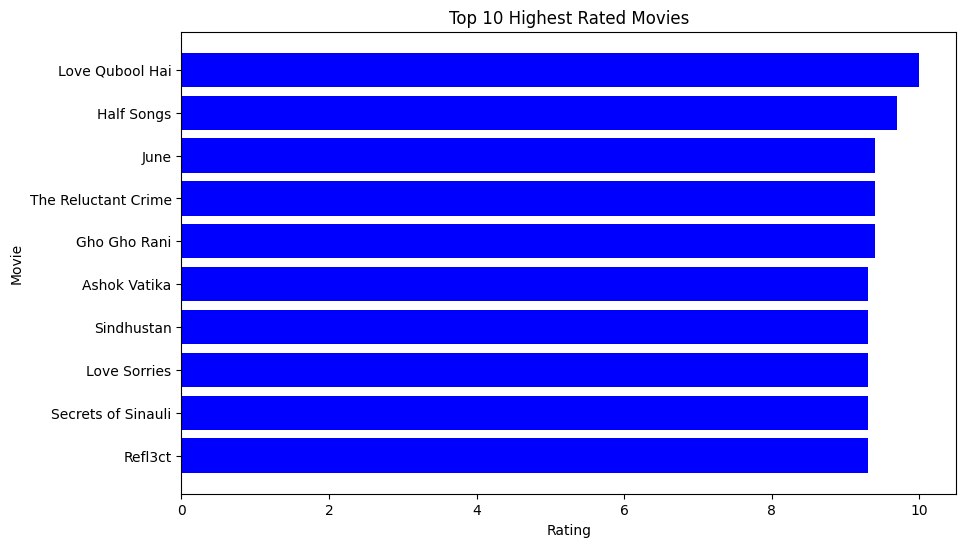

In [28]:
top_rated_movies = df.sort_values(by = 'Rating', ascending = False).head(10)
plt.figure(figsize = (10,6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color = 'Blue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest Rated Movies')
plt.gca().invert_yaxis()
plt.show()

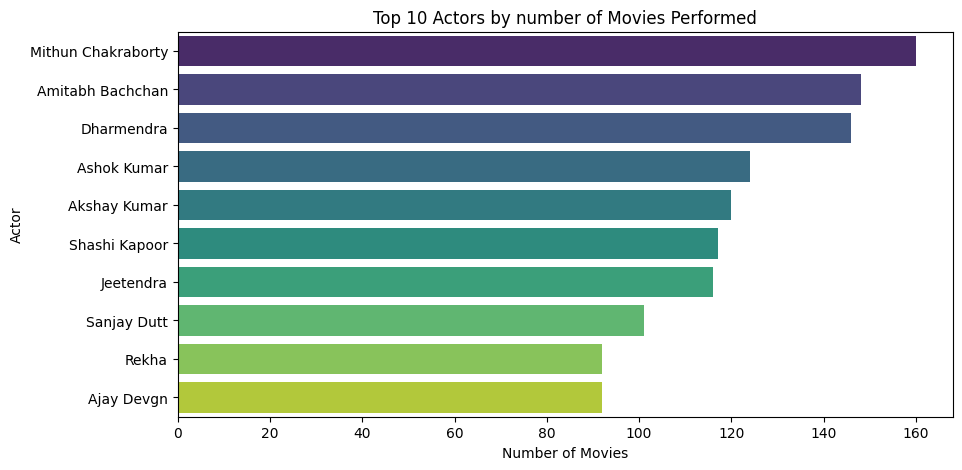

In [29]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
actor_count = actors.value_counts().reset_index()
actor_count.columns = ['Actor', 'Number of Movies']
plt.figure(figsize = (10,5))
sns.barplot(x = 'Number of Movies', y = 'Actor', data = actor_count.head(10), palette = 'viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by number of Movies Performed')
plt.show()

In [37]:
df['Votes'] = df['Votes'].str.replace(',', '')
df['Year'] = df['Year'].astype(str)
df['Duration'] = df['Duration'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)

X = df[['Year', 'Duration', 'Votes']]
Y = df['Rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train, Y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE = mean_absolute_error(Y_test, y_pred)
MSE = mean_squared_error(Y_test, y_pred, squared = False)
R2 = r2_score(Y_test, y_pred)
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"R-Squared Score: {R2}")

Mean Absolute Error: 1.0508508316709804
Mean Squared Error: 1.3017326216212977
R-Squared Score: 0.07222743850241065


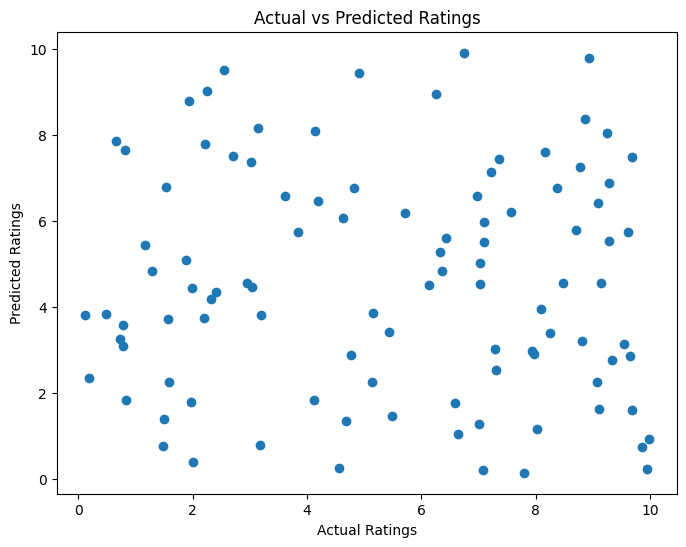

In [45]:
Y_test = np.random.rand(100) * 10  # Actual Ratings
y_pred = np.random.rand(100) * 10  # Predicted Ratings
errors = Y_test - y_pred

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")

plt.show()